# Matplotlib and Seaborn

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.

In [63]:
import matplotlib.pyplot as plt

In [64]:
import numpy as np
import seaborn as sb
sb.set_style('darkgrid')
import pandas as pd
from matplotlib import rcParams

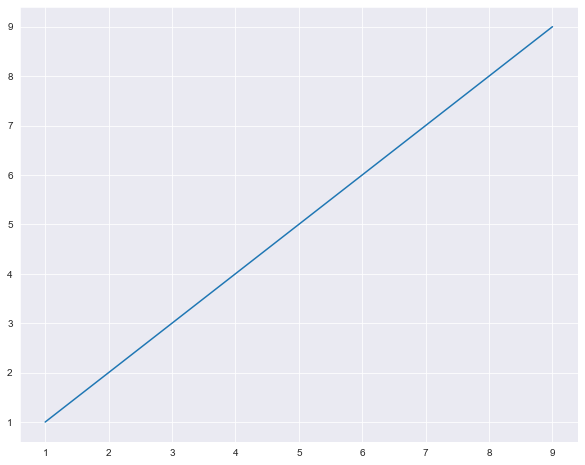

In [65]:
x = range(1,10)
y = [1,2,3,4,5,6,7,8,9]

plt.plot(x,y)

## Subplot

Use subplots to set up and place your Axes on a regular grid. That means that in most cases, Axes and subplot are synonymous, they will designate the same thing. When you do call subplot to add Axes to your figure, do so with the add_subplots() function. There is, however, a difference between the add_axes() and the add_subplots() function,
Consider the following example:

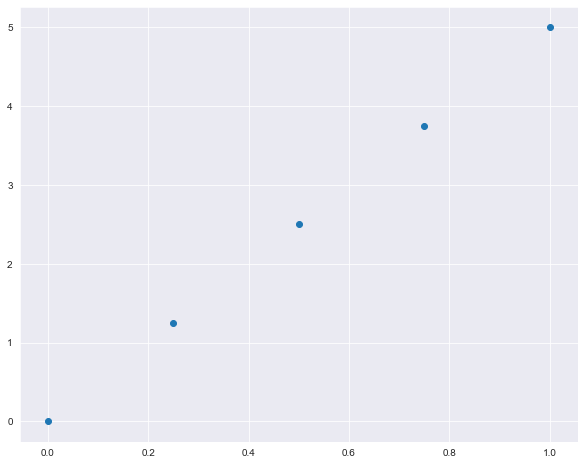

In [101]:
# Create a Figure
fig = plt.figure()

# Set up Axes
ax = fig.add_subplot(111)

# Scatter the data
ax.scatter(np.linspace(0, 1, 5), np.linspace(0, 5, 5))

# Show the plot
plt.show()

What does 111 in code above mean? 111 is equal to 1,1,1, which means that you actually give three arguments to add_subplot(). The three arguments designate the number of rows (1), the number of columns (1) and the plot number (1). So you actually make one subplot.

Consider the following commands and try to envision what the plot will look like and how many Axes your Figure will have: 
    
ax = fig.add_subplot(2,2,1).

## How To Change The Size of Figures

How you can change certain small details that the package sets up for you, such as the figure size.

All you have to do is add an argument figsize to your plt.figure() function of the pyplot module; You just have to specify a tuple with the width and hight of your figure in inches, just like this "plt.figure(figsize=(3,4))"

Note that you can also pass figsize to the the plt.subplots() function of the same module; The inner workings are the same as the figure() function that you've just seen.

See an example of how this would work here:

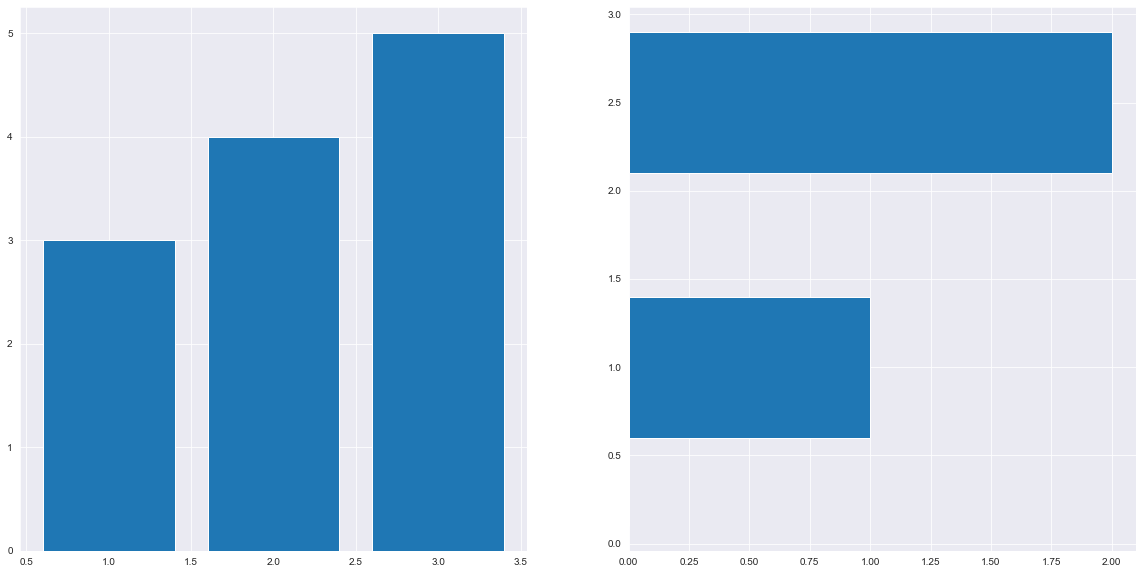

In [102]:
# Initialize the plot
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# or replace the three lines of code above by the following line: 
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

# Plot the data
ax1.bar([1,2,3],[3,4,5])
ax2.barh([0.5,1,2.5],[0,1,2])

# Show the plot
plt.show()

In [66]:
tips = sb.load_dataset('tips')

In [67]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [68]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [69]:
size = tips['total_bill']

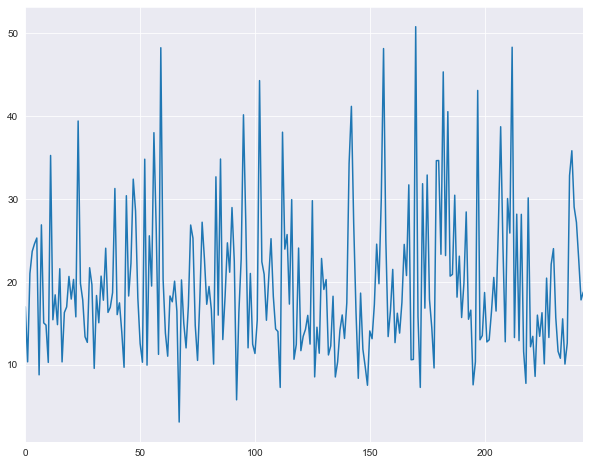

In [70]:
size.plot()

In [71]:
df = tips[['tip','total_bill']]

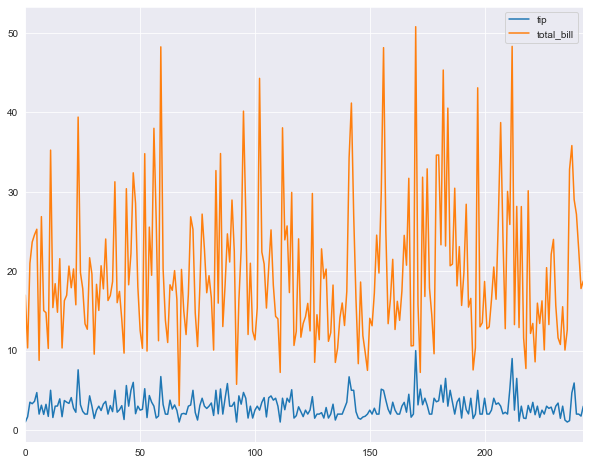

In [72]:
df.plot()

## Pie Charts

In [73]:
rcParams['figure.figsize']=10,8

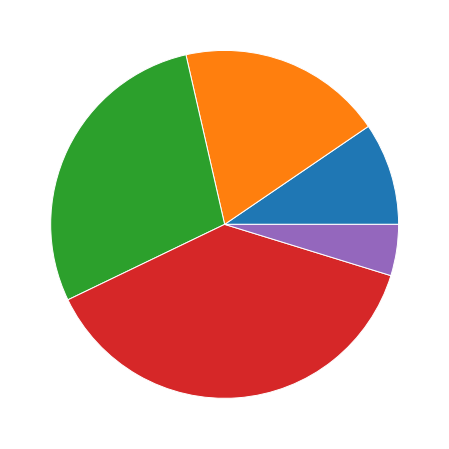

In [74]:
x = [1,2,3,4,0.5]
plt.pie(x)
plt.show()

In [75]:
no_of_smokers = tips['smoker'].value_counts()

In [76]:
no_of_smokers

No     151
Yes     93
Name: smoker, dtype: int64

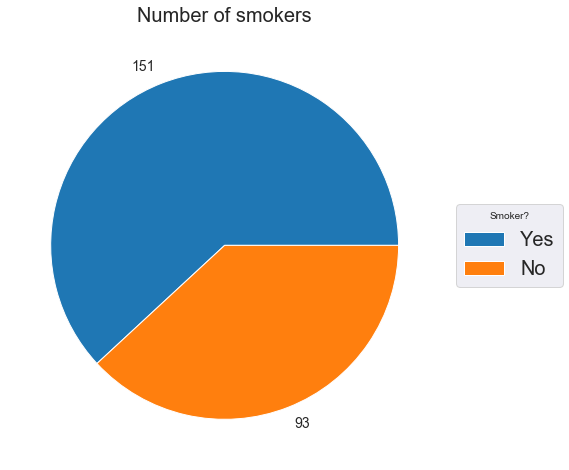

In [77]:
labels = ['Yes', 'No']
plt.pie(no_of_smokers, labels=[no_of_smokers.No, no_of_smokers.Yes], textprops={'fontsize': 14})
plt.title('Number of smokers',fontsize=20)
plt.legend(labels, title='Smoker?', prop={'size': 20}, loc="center right", bbox_to_anchor=(0.8, 0, 0.5, 1))
plt.savefig('number_of_smokers.png')
plt.show()


In [78]:
%ls num*

number_of_smokers.png  numer_of_smokers.png


Displaying an image in the notebook

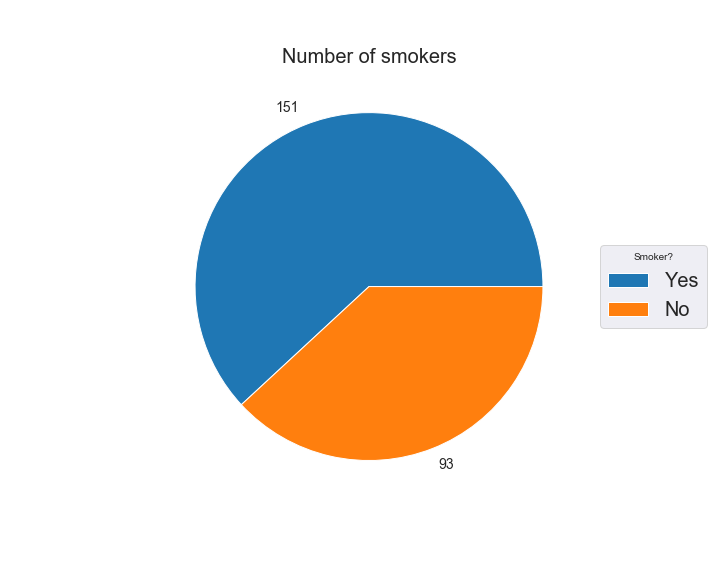

In [79]:
from IPython.display import Image
Image('number_of_smokers.png')

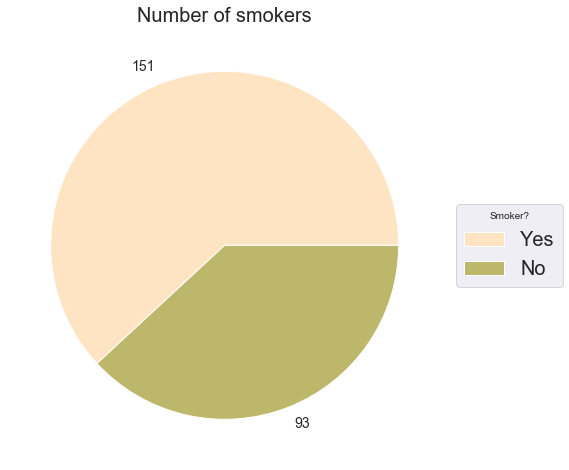

In [80]:
labels = ['Yes', 'No']
color_theme = ['#FFE4C4', '#BDB76B'] # Set colour scheme

plt.pie(no_of_smokers,
        colors=color_theme, 
        labels=[no_of_smokers.No, no_of_smokers.Yes],
        textprops={'fontsize': 14})

plt.title('Number of smokers',fontsize=20)

plt.legend(labels,
           title='Smoker?',
           prop={'size': 20},
           loc="center right",
           bbox_to_anchor=(0.8, 0, 0.5, 1))
plt.show()

# Scatterplots

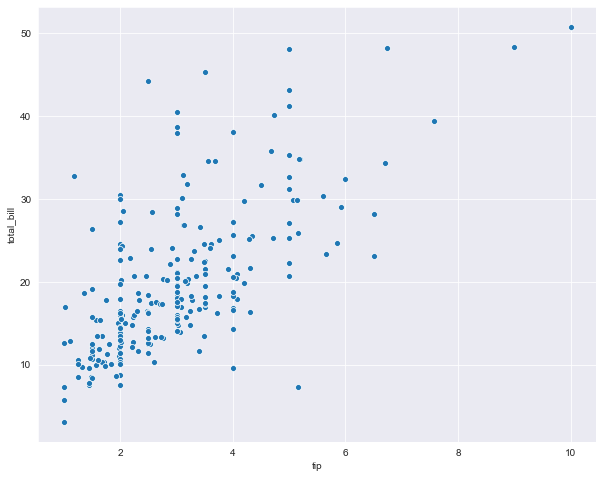

In [81]:
sb.scatterplot(x='tip',y='total_bill',data=tips)

Examples from: https://seaborn.pydata.org/introduction.html

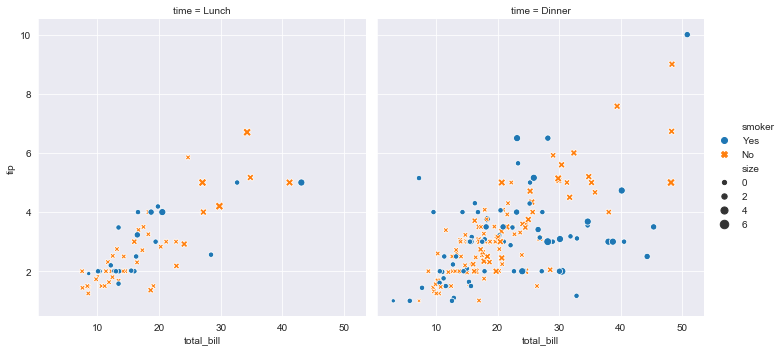

In [82]:
sb.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

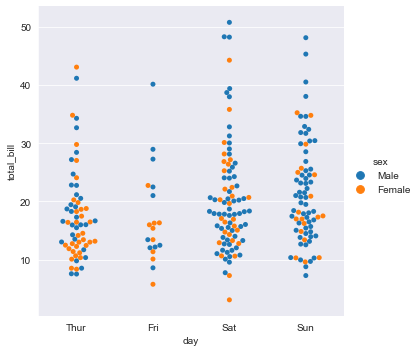

In [83]:
sb.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

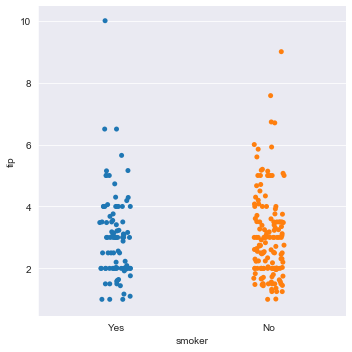

In [84]:
sb.catplot(x="smoker", y="tip", data=tips);

# Boxplots

The Boxplot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data (https://seaborn.pydata.org/tutorial/categorical.html).

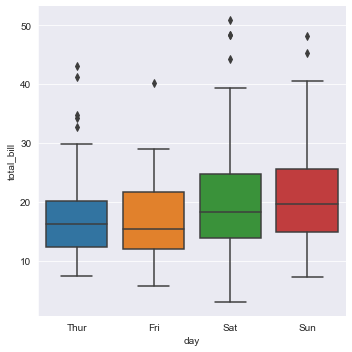

In [85]:
sb.catplot(x="day", y="total_bill", kind="box", data=tips);

# Bar plots

In [86]:
titanic = sb.load_dataset("titanic")
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


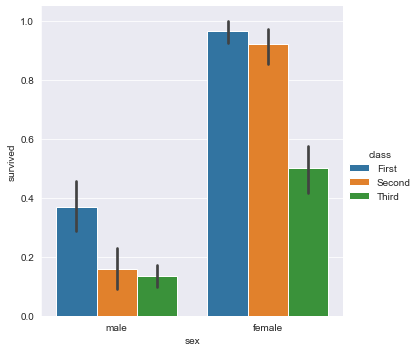

In [87]:
sb.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

# TASKS

In [89]:
tips # Reminder of the tips dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<strong>TASK:</strong> Draw a bar plot showing the average total bill for each day

<strong>TASK:</strong> Draw a box plot that shows total bill amount on the x axis

Task
